## Cell Analysis

#### Import libraries and load data

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('tmp_alb_tx_sums_202004021132.csv')

In [2]:
df.head()

,atoll_schema,site_version,site_name,fuze_site_id,site_record_id,latitude_degrees,longitude_degrees,street_address,city,county,...,antenna_longitude,number_of_tx_antenna_ports,number_of_rx_antenna_ports,tx_record_id,xmtr_location,duplex_type,coverage_type,threshold,fcc_market_number,sum
0,albuquerque,0000,NM1_PINON,355471.0,101508,36.457800,-105.598446,Highway 522 & Blueberry Hill Rd.,Taos,Taos,...,-105.598446,2,4,104953,NaN,NaN,NaN,NaN,NaN,8.263681e+08
1,albuquerque,0000,LSC_HILLRISE_ENB2,676486.0,101524,32.305697,-106.738075,2912 Idaho Ave,Las Cruces,Dona Ana,...,-106.738075,2,2,104954,NaN,NaN,NaN,NaN,NaN,2.184412e+08
2,albuquerque,000x,NM6_HOBB-TIME,1452362.0,102666,32.710036,-103.137736,915 N Shipp St,Hobbs,Lea,...,-103.137736,4,4,104955,NaN,NaN,NaN,NaN,NaN,8.476214e+07
3,albuquerque,000X,ELP_HUNTER,676424.0,592872,31.761794,-106.363022,7564 Gateway East,EL Paso,El Paso,...,-106.363022,4,4,104956,NaN,NaN,NaN,NaN,NaN,1.134106e+08
4,albuquerque,000x,NM6_HOBB-TIME,1452362.0,102666,32.710036,-103.137736,915 N Shipp St,Hobbs,Lea,...,-103.137736,4,4,104957,NaN,NaN,NaN,NaN,NaN,5.166033e+07


#### Select site_version== 0000 only

In [3]:
df.site_version.astype('category')
df= df[df['site_version']== '0000']
df

,atoll_schema,site_version,site_name,fuze_site_id,site_record_id,latitude_degrees,longitude_degrees,street_address,city,county,...,antenna_longitude,number_of_tx_antenna_ports,number_of_rx_antenna_ports,tx_record_id,xmtr_location,duplex_type,coverage_type,threshold,fcc_market_number,sum
0,albuquerque,0000,NM1_PINON,355471.0,101508,36.457800,-105.598446,Highway 522 & Blueberry Hill Rd.,Taos,Taos,...,-105.598446,2,4,104953,NaN,NaN,NaN,NaN,NaN,8.263681e+08
1,albuquerque,0000,LSC_HILLRISE_ENB2,676486.0,101524,32.305697,-106.738075,2912 Idaho Ave,Las Cruces,Dona Ana,...,-106.738075,2,2,104954,NaN,NaN,NaN,NaN,NaN,2.184412e+08
6,albuquerque,0000,NM3_CERRO,355421.0,101443,34.797617,-106.820133,"6mi S of SE Los Lunas, AT&T Road",Los Lunas,Valencia,...,-106.820133,2,2,104959,NaN,NaN,NaN,NaN,NaN,1.614895e+08
7,albuquerque,0000,NM6_ONYX,985315.0,100862,33.353914,-104.524059,3600 S Main Street,Roswell,Chaves,...,-104.524059,2,2,104960,NaN,NaN,NaN,NaN,NaN,2.872214e+08
8,albuquerque,0000,NM3_CERRO,355421.0,101443,34.797617,-106.820133,"6mi S of SE Los Lunas, AT&T Road",Los Lunas,Valencia,...,-106.820133,2,2,104961,NaN,NaN,NaN,NaN,NaN,1.407915e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,albuquerque,0000,NM3_ZINC,676518.0,101438,34.057964,-106.890786,103 Manzanares Ave.,Socorro,Socorro,...,-106.890786,2,2,4407973,NaN,NaN,NaN,NaN,NaN,2.454942e+08
5913,albuquerque,0000,NM3_ZINC,676518.0,101438,34.057964,-106.890786,103 Manzanares Ave.,Socorro,Socorro,...,-106.890786,2,2,4407974,NaN,NaN,NaN,NaN,NaN,3.250458e+08
5914,albuquerque,0000,NM6_GRAPEVINE,676533.0,722741,33.327369,-105.585175,600 Spring Road,Ruidoso,Lincoln,...,-105.585175,2,4,4509520,NaN,NaN,NaN,NaN,NaN,2.962542e+07
5915,albuquerque,0000,NM6_GRAPEVINE,676533.0,722741,33.327369,-105.585175,600 Spring Road,Ruidoso,Lincoln,...,-105.585175,2,4,4509521,NaN,NaN,NaN,NaN,NaN,1.680068e+07


### Looking at a correlation heatmap of features in relation to sum area with correlations being greater than or equal to .1

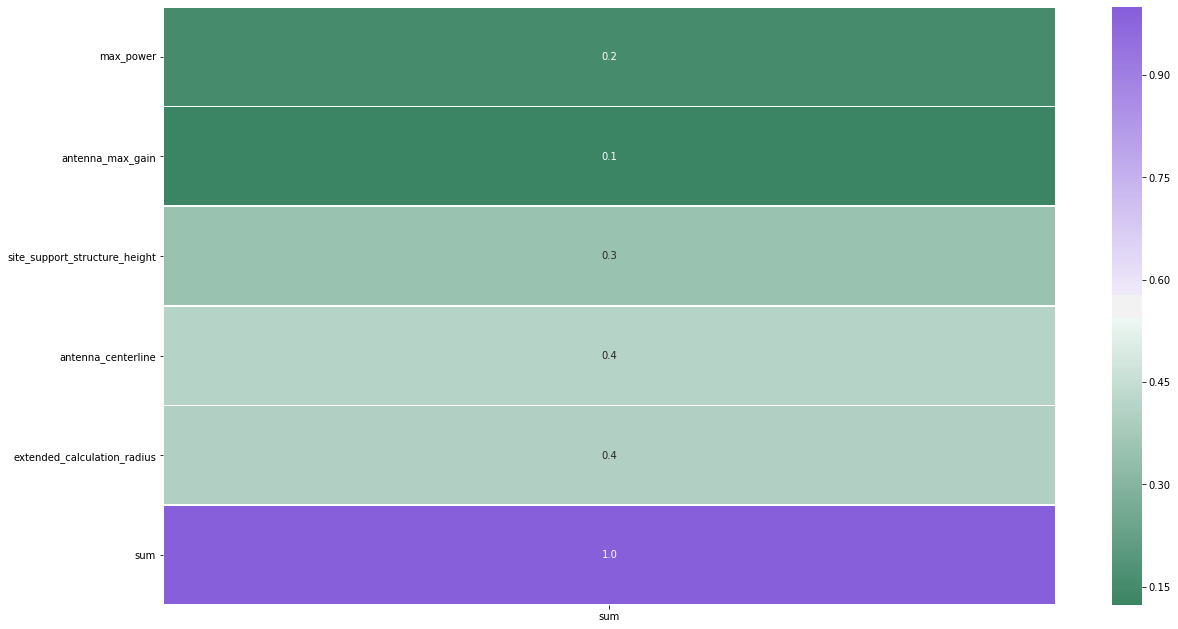

In [34]:
#Looking at a correlation heatmap of features in relation to sum area
fig, ax = plt.subplots(figsize = (20, 11))
cmap = sns.diverging_palette(150, 275, as_cmap=True)
sns.heatmap(df.corr()[['sum']][round(df.corr()['sum'].sort_values(ascending=False), 1) >= .1], annot=True, linewidths=.4, fmt=".1f", cmap=cmap, ax=ax);
#plt.savefig("heatmap.png");

In [6]:
df.isna().sum()

atoll_schema            0
site_version            0
site_name               0
fuze_site_id           64
site_record_id          0
                     ... 
duplex_type          4647
coverage_type        4647
threshold            4647
fcc_market_number    5137
sum                     0
Length: 74, dtype: int64

In [7]:
df = df.loc[:,['max_power','radio_model','main_propagation_model','antenna_max_gain','antenna_h_bw','site_support_structure_height','antenna_centerline','extended_calculation_radius','sum']]
df.head()

,max_power,radio_model,main_propagation_model,antenna_max_gain,antenna_h_bw,site_support_structure_height,antenna_centerline,extended_calculation_radius,sum
0,49.542425,RRH4x45-4R-AWS,WPM_RU_AZNM_15M_AWS_052215_PHO,15.562,81.75,41.000001,37.0,99.999751,8.263681e+08
1,47.781513,UHBC B13 TRDU 2x40,WPM_SU_LCR_ELP_TALL_700_083016_ALB,13.300,71.00,45.011525,38.0,29.999801,2.184412e+08
6,46.000000,Unknown,WPM_RU_AZNM_15M_700_052215_PHO,13.540,79.75,231.059161,120.0,99.999751,1.614895e+08
7,47.781513,2x40AWS,WPM_SU_NM_15M_AWS_052215_ALB,16.000,81.00,197.050453,100.0,29.999801,2.872214e+08
8,46.000000,Unknown,WPM_RU_AZNM_15M_700_052215_PHO,13.540,79.75,231.059161,120.0,99.999751,1.407915e+08


### Created a function to fill numeric and non-numeric nulls with either their mean or mode.

In [9]:
def fill_na_with_mean_or_mode(col):
    if col.dtype == int or col.dtype == float:
        return col.fillna(round(col.median()), inplace=True)
    else:
        return col.fillna(col.mode()[0], inplace=True)

In [10]:
#passed my function through a list comprehension so i could fill all null columns with one line of code
[fill_na_with_mean_or_mode(df[col]) for col in ['max_power','antenna_h_bw']];


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5137 entries, 0 to 5916
Data columns (total 9 columns):
max_power                        5137 non-null float64
radio_model                      5137 non-null object
main_propagation_model           5137 non-null object
antenna_max_gain                 5137 non-null float64
antenna_h_bw                     5137 non-null float64
site_support_structure_height    5137 non-null float64
antenna_centerline               5137 non-null float64
extended_calculation_radius      5137 non-null float64
sum                              5137 non-null float64
dtypes: float64(7), object(2)
memory usage: 401.3+ KB


In [12]:
df['sum'].describe()

count    5.137000e+03
mean     5.685331e+08
std      1.227489e+09
min      9.001435e+02
25%      3.005578e+07
50%      1.627407e+08
75%      5.791687e+08
max      2.926708e+10
Name: sum, dtype: float64

### Exploratory Data Analysis

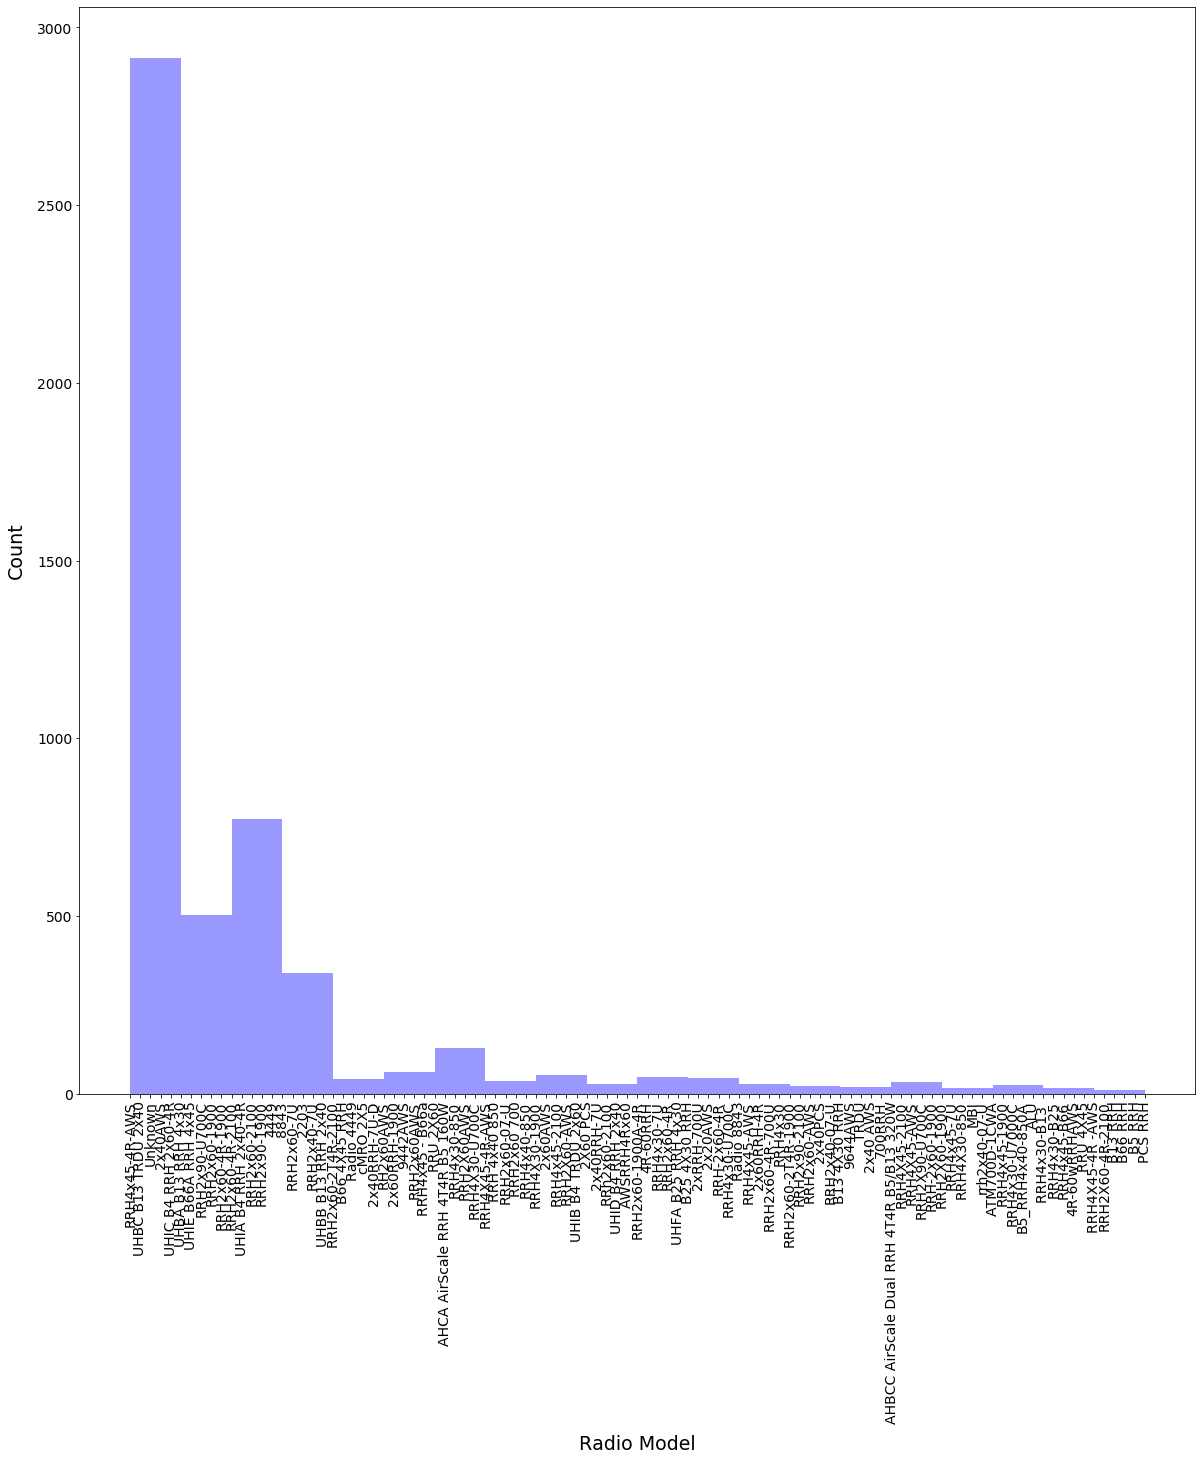

In [13]:
import numpy as np
fig, ax = plt.subplots(figsize = (20, 20))
sns.distplot(df['radio_model'], kde=False,color='blue' ,bins=20)

plt.xlabel('Radio Model', fontsize=19, labelpad=11)
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);


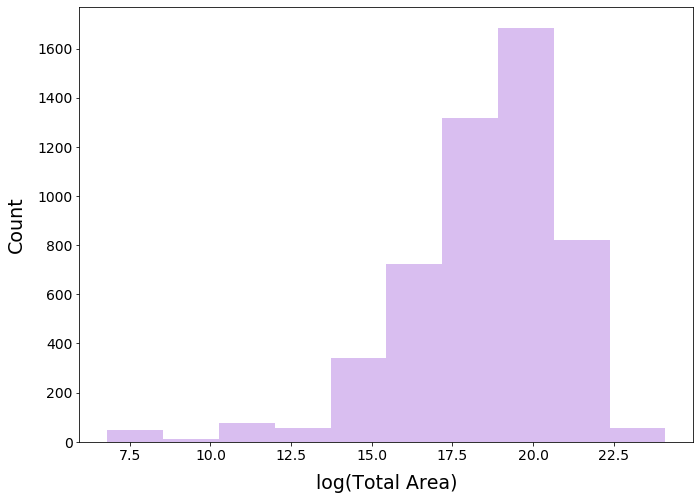

In [14]:
import numpy as np
fig, ax = plt.subplots(figsize = (11, 8))
sns.distplot(np.log(df['sum']), kde=False, color='#A15EDB', bins=10)

plt.xlabel('log(Total Area)', fontsize=19, labelpad=11)
plt.xticks(fontsize=14)
plt.ylabel('Count', fontsize=19, labelpad=11)
plt.yticks(fontsize=14);


#looking at the distribution of my target after taking the log

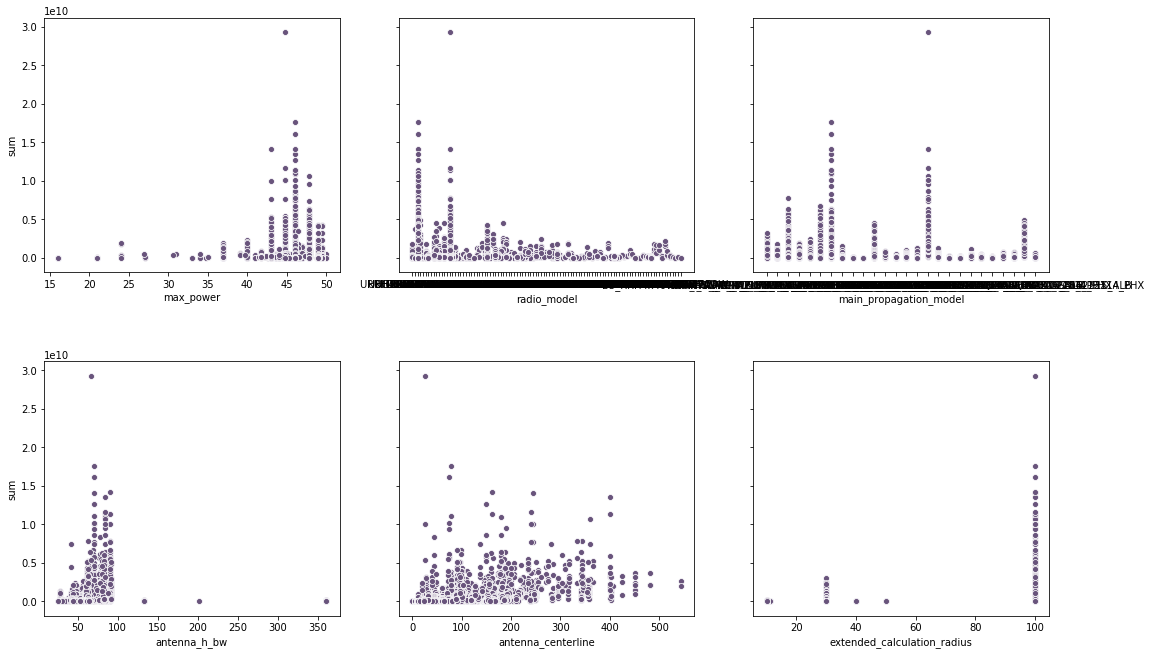

In [15]:
#plotting some of the features from the correlation heatmap to see the linear relationship beyond numbers
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (18,11), sharey=True)
fig.subplots_adjust(wspace=.2, hspace=.35)
#sns.set(font_scale=.5)

sns.scatterplot(x=df.max_power, y=df['sum'], ax=ax[0, 0], color='#69547C', )
sns.scatterplot(x=df.radio_model, y=df['sum'], ax=ax[0, 1], color='#69547C')
sns.scatterplot(x=df.main_propagation_model, y=df['sum'], ax=ax[0, 2], color='#69547C')
sns.scatterplot(x=df.antenna_h_bw, y=df['sum'], ax=ax[1, 0], color='#69547C')
sns.scatterplot(x=df.antenna_centerline, y=df['sum'], ax=ax[1, 1], color='#69547C')
sns.scatterplot(x=df.extended_calculation_radius, y=df['sum'], ax=ax[1, 2], color='#69547C')

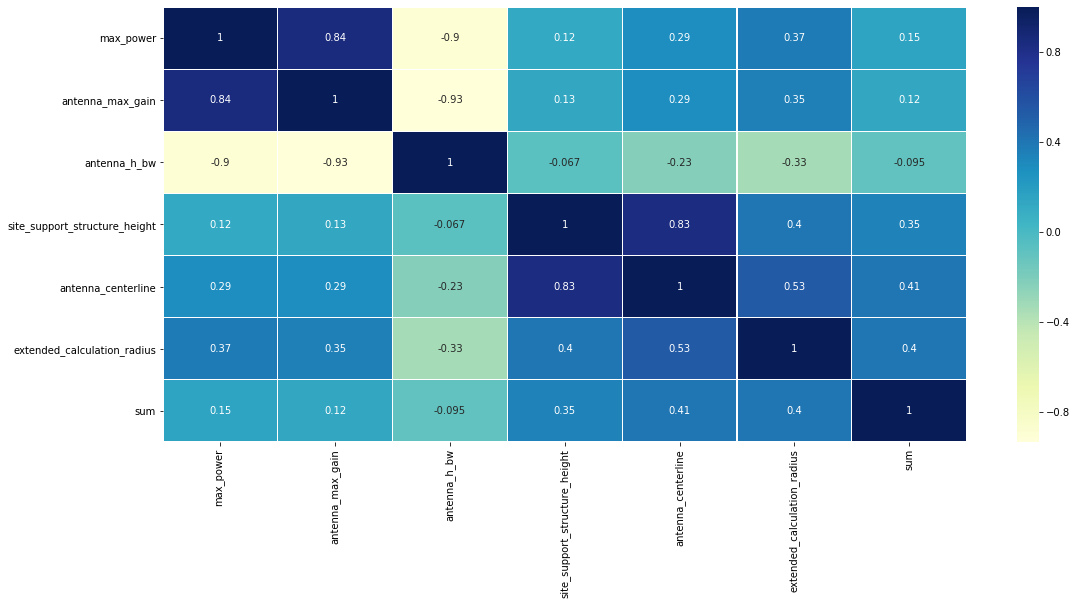

In [16]:
import seaborn as sns
corrmat = df.corr() 
f, ax = plt.subplots(figsize =(18, 8)) 
sns.heatmap(corrmat,annot=True, ax = ax, cmap ="YlGnBu", linewidths = 0.1)
plt.show()

In [20]:
df['radio_model'] = df['radio_model'].astype('category')
df['main_propagation_model'] = df['main_propagation_model'].astype('category')
df_new=df.loc[:,['max_power','radio_model','main_propagation_model','antenna_h_bw','antenna_max_gain','site_support_structure_height','antenna_centerline','extended_calculation_radius']]

### One Hot Encoding

In [21]:
# label encoding the data 
#from sklearn.preprocessing import LabelEncoder 
#le = LabelEncoder() 
#df['radio_model']= le.fit_transform(df['radio_model']) 
#df['main_propagation_model']= le.fit_transform(df['main_propagation_model']) 
from sklearn.preprocessing import OneHotEncoder 
le = OneHotEncoder() 
df_new= le.fit_transform(df_new).toarray()

In [22]:
df_new=pd.DataFrame(df_new)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,1547,1548,1549,1550,1551,1552,1553,1554,1555,1556
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
#Set the training and test data sets
#df_features = df.drop("sum", axis=1) # drop labels 
df_features=df_new
#Select the label
df_target = df["sum"]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_features_std = scaler.fit_transform(df_features)

In [25]:
df_features_std

array([[-0.03419595, -0.01973535, -0.30071026, ..., -0.05411602,
        -0.02417312,  1.2784205 ],
       [-0.03419595, -0.01973535, -0.30071026, ..., -0.05411602,
        -0.02417312, -0.78221524],
       [-0.03419595, -0.01973535, -0.30071026, ..., -0.05411602,
        -0.02417312,  1.2784205 ],
       ...,
       [-0.03419595, -0.01973535, -0.30071026, ..., -0.05411602,
        -0.02417312,  1.2784205 ],
       [-0.03419595, -0.01973535, -0.30071026, ..., -0.05411602,
        -0.02417312,  1.2784205 ],
       [-0.03419595, -0.01973535, -0.30071026, ..., -0.05411602,
        -0.02417312,  1.2784205 ]])

### Split Data 

In [26]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df_features_std, df_target, test_size=0.2, random_state=42)

### Try RandomForestRegressor() and DecisionTreeRegressor()

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
model= RandomForestRegressor(random_state=42)
#model= DecisionTreeRegressor(random_state=42)
model.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [28]:
y_pred=model.predict(test_x)

In [29]:
y_pred[0:10]

array([2.31211746e+09, 2.70566677e+09, 7.78163708e+06, 1.35126345e+08,
       2.33552961e+08, 1.37755466e+07, 3.22532237e+08, 1.49208257e+08,
       1.63673598e+08, 2.02549677e+07])

In [35]:
test_y[0:10]

1097    3.046767e+09
1253    3.694258e+09
4568    6.965031e+06
1053    2.522053e+08
4331    4.460817e+08
5772    1.616554e+07
3388    1.880570e+08
5210    1.466685e+08
754     1.353617e+09
5375    3.135829e+07
Name: sum, dtype: float64

### Root mean square value

In [37]:
mse=mean_squared_error(test_y,y_pred)
rmse= np.sqrt(mse)
rmse

849113439.092033

### R- squared value
#### R-squared is a statistical measure of how close the data are to the fitted regression line

In [32]:
r2_score(test_y, y_pred)

0.553579801488898

In [40]:
actualvspredicted= pd.DataFrame({'Actual': test_y,'Predicted': y_pred})
actualvspredicted

,Actual,Predicted
1097,3.046767e+09,2.312117e+09
1253,3.694258e+09,2.705667e+09
4568,6.965031e+06,7.781637e+06
1053,2.522053e+08,1.351263e+08
4331,4.460817e+08,2.335530e+08
...,...,...
3752,1.007604e+08,1.348207e+08
4407,1.121789e+09,9.165619e+08
5625,3.201431e+08,3.926035e+08
3542,1.091077e+06,1.091077e+06


In [41]:
actualvspredicted.to_csv('Test_predictions.csv')

In [38]:
# 55% indicates that the model explains 55 percent variability of the response data around its mean.